In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_val, y_val = X_train[55000:, ..., np.newaxis], y_train[55000:]
X_train, y_train = X_train[:55000, ..., np.newaxis], y_train[:55000]
X_test = X_test[..., np.newaxis]

<IPython.core.display.Javascript object>

In [3]:
print("Image shape: {}".format(X_train[0].shape), end = '\n\n')
print("Training set: {} samples".format(len(X_train)))
print("Test set: {} samples".format(len(X_test)))
print("Validation set: {} samples".format(len(X_val)))

Image shape: (28, 28, 1)

Training set: 55000 samples
Test set: 10000 samples
Validation set: 5000 samples


In [4]:
X_train = np.pad(X_train, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')
X_test = np.pad(X_test, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')
X_val = np.pad(X_val, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')

In [5]:
print("Updated Image Shape for: ", end='\n\n')
print("- Training set: {}".format(X_train.shape))
print("- Validation set: {}".format(X_val.shape))
print("- Test set: {}".format(X_test.shape))

Updated Image Shape for: 

- Training set: (55000, 32, 32, 1)
- Validation set: (5000, 32, 32, 1)
- Test set: (10000, 32, 32, 1)


In [6]:
X_train, X_val, X_test = X_train/ float(255), X_val/ float(255), X_test/ float(255)
X_train -= np.mean(X_train)
X_test -= np.mean(X_test)
X_val -= np.mean(X_val)

In [7]:
model = Sequential()

model.add(Conv2D(6, kernel_size = (5, 5), strides = (1, 1), activation = 'tanh', input_shape = (32, 32, 1), padding = 'valid'))

model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(Flatten())

model.add(Dense(120, activation='tanh'))

model.add(Dense(84, activation='tanh'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 

In [8]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 5)

Epoch 1/5
1719/1719 [==============================] - 25s 14ms/step - loss: 0.6031 - accuracy: 0.8389 - val_loss: 0.2542 - val_accuracy: 0.9336
Epoch 2/5
1719/1719 [==============================] - 23s 13ms/step - loss: 0.2780 - accuracy: 0.9187 - val_loss: 0.1820 - val_accuracy: 0.9508
Epoch 3/5
1719/1719 [==============================] - 23s 13ms/step - loss: 0.2103 - accuracy: 0.9371 - val_loss: 0.1467 - val_accuracy: 0.9590
Epoch 4/5
1719/1719 [==============================] - 23s 13ms/step - loss: 0.1679 - accuracy: 0.9500 - val_loss: 0.1179 - val_accuracy: 0.9668
Epoch 5/5
1719/1719 [==============================] - 22s 13ms/step - loss: 0.1386 - accuracy: 0.9587 - val_loss: 0.1000 - val_accuracy: 0.9716


In [9]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
print('Test set error rate: {}'.format(np.mean(y_pred != y_test)))

313/313 [==============================] - 3s 8ms/step
Test set error rate: 0.0361


Plot of the training error:


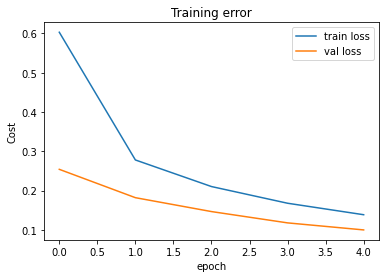

In [10]:
print('Plot of the training error:')
plt.title('Training error')
plt.ylabel('Cost')
plt.xlabel('epoch')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'], loc='upper right')
plt.show()